<a href="https://www.kaggle.com/code/easyice/mnist-digit-class-ann-98-acc?scriptVersionId=262786451" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

from keras.datasets import mnist
tf.random.set_seed(3)

import warnings
warnings.filterwarnings('ignore')

2025-09-19 11:44:17.649107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758282257.962085      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758282258.053876      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'Y train shape: {y_train.shape}')
print(f'Y test shape: {y_test.shape}\n')

print(f'Unique values in y_train: {np.unique(y_train)}')
print(f'Unique values in y_test: {np.unique(y_test)}\n')

print(f'Missing values in X train: {np.isnan(X_train).sum().sum()}')
print(f'Missing values in X test: {np.isnan(X_test).sum().sum()}')
print(f'Missing values in y train: {np.isnan(y_train).sum().sum()}')
print(f'Missing values in y test: {np.isnan(y_test).sum().sum()}')

X train shape: (60000, 28, 28)
X test shape: (10000, 28, 28)
Y train shape: (60000,)
Y test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Missing values in X train: 0
Missing values in X test: 0
Missing values in y train: 0
Missing values in y test: 0


In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

The number written in image is: 2


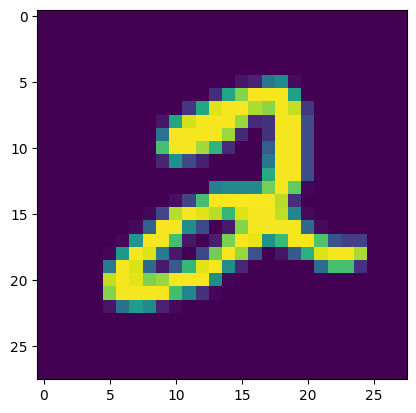

In [6]:
# to view image
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

# corresponding label value
print('The number written in image is:',y_train[5])

In [7]:
# scalling data
X_train = X_train/255
X_test = X_test/255

## Building Neural Network

In [8]:
# Building Neural Network

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

2025-09-19 11:44:38.451501: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compiling model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# training the model
history = model.fit(X_train,y_train,batch_size=32,epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8617 - loss: 0.4765 - val_accuracy: 0.9427 - val_loss: 0.1784
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9622 - loss: 0.1266 - val_accuracy: 0.9588 - val_loss: 0.1278
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9761 - loss: 0.0793 - val_accuracy: 0.9634 - val_loss: 0.1183
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9836 - loss: 0.0562 - val_accuracy: 0.9660 - val_loss: 0.1134
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9684 - val_loss: 0.1137
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9735 - val_loss: 0.0980
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9716 - val_loss: 0.1125
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9930 - loss: 0.0218 - 

- Training accuracy after 50 epoch 99.88%

In [12]:
loss,accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.2842
Test Accuracy: 97.46000170707703


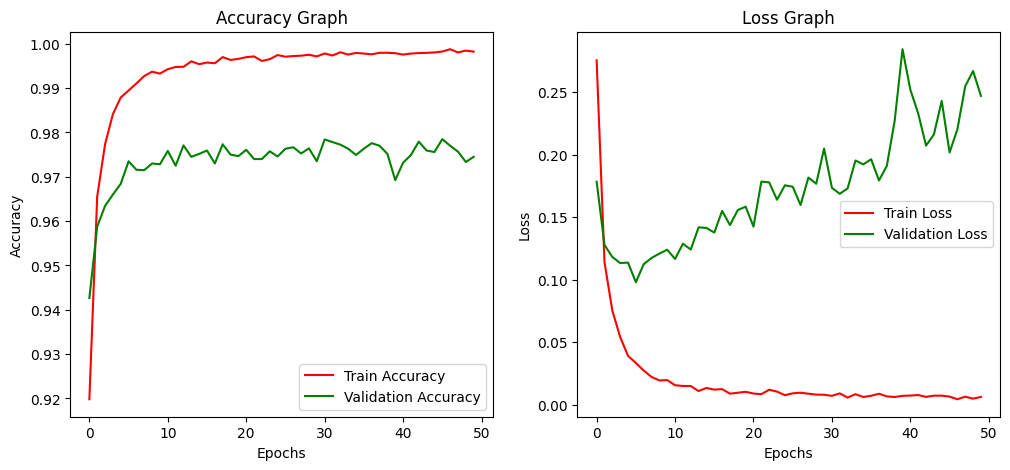

In [13]:
# accuracy and loss graph
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].plot(history.history['accuracy'],c='r',label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'],c='g',label='Validation Accuracy')
axes[0].set_title('Accuracy Graph')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'],c='r',label='Train Loss')
axes[1].plot(history.history['val_loss'],c='g',label='Validation Loss')
axes[1].set_title('Loss Graph')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

## Let's try Early stopping, Batch Normalization

In [14]:

from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dropout(0.2))
model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))

In [15]:
# compiling
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1, mode='auto')

# train model
history = model1.fit(X_train,y_train,batch_size=32,epochs=50,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6942 - loss: 0.9791 - val_accuracy: 0.9376 - val_loss: 0.1993
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8836 - loss: 0.3846 - val_accuracy: 0.9539 - val_loss: 0.1479
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9063 - loss: 0.3081 - val_accuracy: 0.9588 - val_loss: 0.1306
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9181 - loss: 0.2756 - val_accuracy: 0.9628 - val_loss: 0.1202
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9274 - loss: 0.2408 - val_accuracy: 0.9676 - val_loss: 0.1061
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9335 - loss: 0.2239 - val_accuracy: 0.9712 - val_loss: 0.0976
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9363 - loss: 0.2101 - val_accuracy: 0.9690 - val_loss: 0.0992
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9414 - loss: 0.2000 -

In [16]:
loss,accuracy = model1.evaluate(X_test,y_test)
print(f'Test Accuracy: {accuracy*100}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0799
Test Accuracy: 98.00999760627747


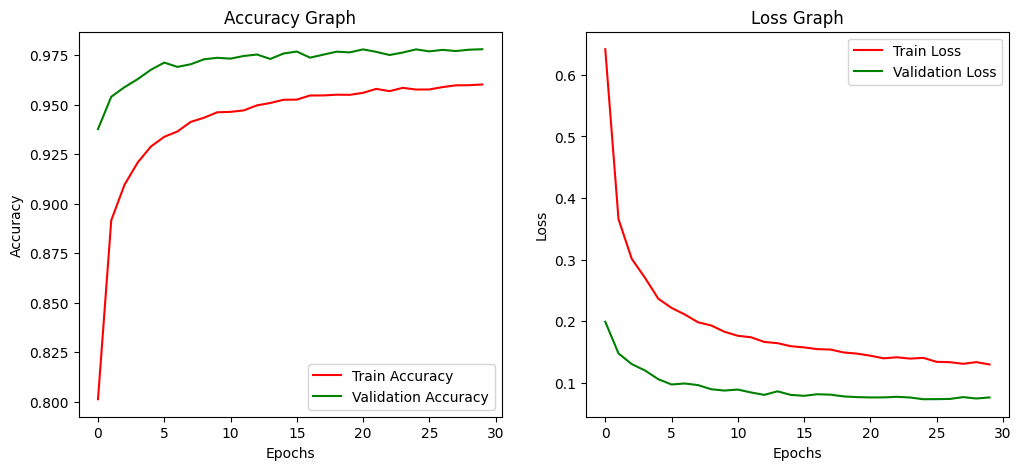

In [17]:
# accuracy and loss graph
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(12,5))

axes[0].plot(history.history['accuracy'],c='r',label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'],c='g',label='Validation Accuracy')
axes[0].set_title('Accuracy Graph')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'],c='r',label='Train Loss')
axes[1].plot(history.history['val_loss'],c='g',label='Validation Loss')
axes[1].set_title('Loss Graph')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

- #### Now this graph is much balanced no spike unlike previous
- model appears balanced because train and validation accuracy are both high and close, and loss values are comparable.

In [18]:
# prediction
y_probability = model1.predict(X_test)
print(y_probability.shape)

y_probability[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


array([6.68173755e-07, 5.51446874e-06, 3.21111770e-06, 1.36770805e-05,
       2.60954221e-06, 9.59565909e-07, 3.94760313e-08, 9.99926507e-01,
       1.46213665e-06, 4.53078865e-05], dtype=float32)

### model.predict() gives the prediction probability of each class for that data point

In [19]:
## Converting prediction probabilities to class labels for all data point.

y_pred = y_probability.argmax(axis=1)

In [20]:
y_pred[0]

7

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9801

In [22]:
# confusion matrix
from tensorflow.math import confusion_matrix

ct = confusion_matrix(y_test,y_pred)
print(ct)

tf.Tensor(
[[ 971    1    0    1    1    0    3    1    2    0]
 [   0 1120    3    2    0    0    4    0    6    0]
 [   5    0 1009    2    2    0    1    7    6    0]
 [   0    0    6  994    0    0    0    7    3    0]
 [   2    0    2    0  956    0    4    1    1   16]
 [   2    0    0   10    1  866    5    1    6    1]
 [   5    2    0    0    4    3  941    0    3    0]
 [   3    5    8    2    0    0    0 1004    2    4]
 [   3    1    1    5    3    1    2    3  953    2]
 [   4    2    0    7    3    2    0    3    1  987]], shape=(10, 10), dtype=int32)


Text(83.22222222222221, 0.5, 'True Labels')

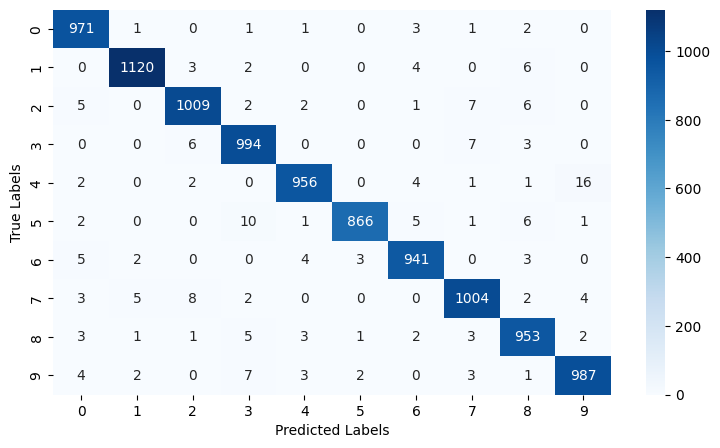

In [23]:
import seaborn as sns
plt.figure(figsize=(9,5))
sns.heatmap(ct,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

## Predictive System for random image

4297
True Label of selected input: 7


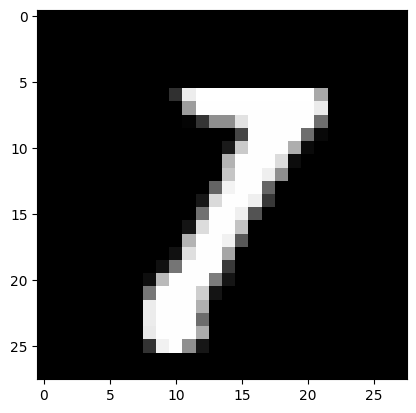

In [24]:
import random
selected = random.randint(0,X_test.shape[0])
print(selected)

test_input = X_test[selected]
print('True Label of selected input:',y_test[selected])

# image
plt.imshow(test_input.reshape(28,28), cmap='gray')

In [25]:
## Prediction 

image_reshaped = test_input.reshape([1,28,28])

input_probability = model.predict(image_reshaped)
input_probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[1.41882900e-35, 1.01255560e-12, 1.00382945e-23, 2.23627683e-17,
        1.34562689e-37, 6.85996521e-20, 0.00000000e+00, 1.00000000e+00,
        1.15544635e-20, 5.00366557e-18]], dtype=float32)

In [26]:
# prob to class
class_pred = np.argmax(input_probability)
class_pred

7

## THANK YOU! PLease Upvote.